In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
)
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    mean_absolute_error, ConfusionMatrixDisplay,
    confusion_matrix, accuracy_score, roc_curve,
    classification_report, mean_squared_error, precision_score, recall_score, f1_score
)

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.shape

(1025, 14)

In [7]:
df['target'].value_counts()

,count
target,
1,526
0,499


In [8]:
526 + 499

1025

In [9]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
df.duplicated().sum()

np.int64(723)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
X = df.drop(columns=['target'], axis=1)
y = df['target']

In [14]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [15]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [16]:
y.value_counts()

,count
target,
1,164
0,138


In [17]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)

In [18]:

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_pred = model.predict(X_test)

In [20]:
model.score(X_train, y_train)

1.0

In [21]:
model.score(X_test, y_test)

0.8461538461538461

In [22]:
for i in range(10, 1000, 100):
    print(f"Running n_estimators = {i}")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"model score = {score}")
    print()

Running n_estimators = 10
model score = 0.8241758241758241

Running n_estimators = 110
model score = 0.8681318681318682

Running n_estimators = 210
model score = 0.8461538461538461

Running n_estimators = 310
model score = 0.8241758241758241

Running n_estimators = 410
model score = 0.8461538461538461

Running n_estimators = 510
model score = 0.8571428571428571

Running n_estimators = 610
model score = 0.8461538461538461

Running n_estimators = 710
model score = 0.8461538461538461

Running n_estimators = 810
model score = 0.8461538461538461

Running n_estimators = 910
model score = 0.8681318681318682



In [23]:


# Set a seed for reproducibility (optional)
np.random.seed(42)

# Define the number of rows
num_rows = 888

# Define data options based on the image
makes = ['Iphone', 'Motorolla', 'Nokia', 'Ssamsung']
colours = ['Black', 'White', 'Green', 'Blue']

# Generate random data
data = {
    'Make': np.random.choice(makes, num_rows),
    'Colour': np.random.choice(colours, num_rows),
    # generating random memory between roughly 10,000 and 220,000 kb
    'Memory(kb)': np.random.randint(10000, 220000, num_rows),
    # Sim cards seem to be mostly 4 or 5 based on the snippet
    'Sim Cards': np.random.choice([3, 4, 5], num_rows),
    # Generate random prices between 200 and 1000
    'Price_raw': np.random.randint(200, 1000, num_rows)
}

# Create DataFrame
df = pd.DataFrame(data)

# Format the 'Price' column to add '$' and '.00'
df['Price'] = df['Price_raw'].apply(lambda x: f"${x}.00")

# Drop the raw numeric price column used for generation
df = df.drop(columns=['Price_raw'])

# Display the first few rows and the shape to confirm
print(df.head())
print(df.tail())
print(f"\nShape: {df.shape}")

       Make Colour  Memory(kb)  Sim Cards    Price
0     Nokia   Blue       74929          5  $880.00
1  Ssamsung  Black       83506          4  $622.00
2    Iphone  Green       44911          5  $797.00
3     Nokia  Green       97127          4  $376.00
4     Nokia  Black      172893          4  $728.00
          Make Colour  Memory(kb)  Sim Cards    Price
883   Ssamsung  Green      178452          3  $282.00
884   Ssamsung  Black      134398          3  $376.00
885     Iphone   Blue      120677          4  $397.00
886     Iphone  Green       58320          4  $823.00
887  Motorolla   Blue      188486          5  $767.00

Shape: (888, 5)


In [24]:
df.head()

,Make,Colour,Memory(kb),Sim Cards,Price
0,Nokia,Blue,74929,5,$880.00
1,Ssamsung,Black,83506,4,$622.00
2,Iphone,Green,44911,5,$797.00
3,Nokia,Green,97127,4,$376.00
4,Nokia,Black,172893,4,$728.00


In [25]:
df.dtypes

,0
Make,object
Colour,object
Memory(kb),int64
Sim Cards,int64
Price,object


In [26]:
df['Price'] = df['Price'].str[:-2]

In [27]:
df['Price']

,Price
0,$880.
1,$622.
2,$797.
3,$376.
4,$728.
...,...
883,$282.
884,$376.
885,$397.
886,$823.


In [28]:
df['Price'] = df['Price'].str.replace(r"[\$\,\.]", "", regex=True)

In [29]:
df.dtypes

,0
Make,object
Colour,object
Memory(kb),int64
Sim Cards,int64
Price,object


In [30]:
df['Price']

,Price
0,880
1,622
2,797
3,376
4,728
...,...
883,282
884,376
885,397
886,823


In [31]:
df['Price'] = df['Price'].astype(int)

In [32]:
df.head()

,Make,Colour,Memory(kb),Sim Cards,Price
0,Nokia,Blue,74929,5,880
1,Ssamsung,Black,83506,4,622
2,Iphone,Green,44911,5,797
3,Nokia,Green,97127,4,376
4,Nokia,Black,172893,4,728


In [33]:
df.dtypes

,0
Make,object
Colour,object
Memory(kb),int64
Sim Cards,int64
Price,int64


In [34]:
X = df.drop(columns=['Price'], axis=1)
y = df['Price']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42
)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((710, 4), (178, 4), (710,), (178,))

In [37]:


cat_features = ["Make", "Colour", "Sim Cards"]
preprocessor = ColumnTransformer([
    ('one_hot_cat_features', OneHotEncoder(), cat_features)
], remainder="passthrough")
X_transform = preprocessor.fit_transform(X)

In [38]:
pd.DataFrame(X_transform).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,74929.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,83506.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,44911.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,97127.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,172893.0


In [39]:
X_transform_2 = pd.get_dummies(df[cat_features])

In [40]:
X_transform_2.head()

,Sim Cards,Make_Iphone,Make_Motorolla,Make_Nokia,Make_Ssamsung,Colour_Black,Colour_Blue,Colour_Green,Colour_White
0,5,False,False,True,False,False,True,False,False
1,4,False,False,False,True,True,False,False,False
2,5,True,False,False,False,False,False,True,False
3,4,False,False,True,False,False,False,True,False
4,4,False,False,True,False,True,False,False,False


In [41]:
X_transform_2['Make_Iphone'].astype(int)

,Make_Iphone
0,0
1,0
2,1
3,0
4,0
...,...
883,0
884,0
885,1
886,1


In [42]:
# Define the list of columns you want to convert
columns_to_fix = [
    "Make_Iphone", "Make_Motorolla", "Make_Nokia", "Make_Ssamsung",
    "Colour_Black", "Colour_Blue", "Colour_Green", "Colour_White"
]

# Use double brackets [[ ]] to select them, and assign back to update the DataFrame
X_transform_2[columns_to_fix] = X_transform_2[columns_to_fix].astype(int)

In [43]:
X_transform_2

,Sim Cards,Make_Iphone,Make_Motorolla,Make_Nokia,Make_Ssamsung,Colour_Black,Colour_Blue,Colour_Green,Colour_White
0,5,0,0,1,0,0,1,0,0
1,4,0,0,0,1,1,0,0,0
2,5,1,0,0,0,0,0,1,0
3,4,0,0,1,0,0,0,1,0
4,4,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
883,3,0,0,0,1,0,0,1,0
884,3,0,0,0,1,1,0,0,0
885,4,1,0,0,0,0,1,0,0
886,4,1,0,0,0,0,0,1,0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X_transform_2, y, test_size=0.2
)

In [45]:

model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [46]:
model.score(X_train, y_train)

0.08480000131554999

In [47]:


# Set seed for reproducibility
np.random.seed(42)

num_rows = 1000

# 1. Define data choices
makes = ['Nokia', 'Ssamsung', 'Iphone', 'Motorolla']
colours = ['White', 'Red', 'Black', 'Blue', 'Green']

# 2. Generate basic random data
data = {
    'Make': np.random.choice(makes, num_rows),
    'Colour': np.random.choice(colours, num_rows),
    'Memory(kb)': np.random.randint(10000, 220000, num_rows).astype(float),
    'Sim Cards': np.random.choice([3, 4, 5], num_rows),
    'Price_raw': np.random.randint(200, 1000, num_rows)
}

df = pd.DataFrame(data)

# 3. Introduce missing values (NaN) to mimic the screenshot
# roughly 5% chance of missing Make
df.loc[df.sample(frac=0.05).index, 'Make'] = np.nan
# roughly 10% chance of missing Colour
df.loc[df.sample(frac=0.1).index, 'Colour'] = np.nan
# roughly 10% chance of missing Memory
df.loc[df.sample(frac=0.1).index, 'Memory(kb)'] = np.nan

# 4. Format Price column and add missing values there too
df['Price'] = df['Price_raw'].apply(lambda x: f"${x}.00")
df.loc[df.sample(frac=0.05).index, 'Price'] = np.nan
df = df.drop(columns=['Price_raw'])



In [48]:
df.isna().sum()

,0
Make,50
Colour,100
Memory(kb),100
Sim Cards,0
Price,50


In [49]:
df.head()

,Make,Colour,Memory(kb),Sim Cards,Price
0,Iphone,White,137118.0,5,$959.00
1,Motorolla,White,78577.0,3,$553.00
2,Nokia,White,206713.0,4,$838.00
3,Iphone,Green,19078.0,5,$274.00
4,Iphone,Blue,166075.0,3,$915.00


In [50]:
df.isna().sum()

,0
Make,50
Colour,100
Memory(kb),100
Sim Cards,0
Price,50


In [51]:
df.dropna(subset=['Price'],inplace=True)

In [52]:
df.isna().sum()

,0
Make,49
Colour,91
Memory(kb),98
Sim Cards,0
Price,0


In [53]:
df['Price'] = df['Price'].str[:-2]
df['Price'] = df['Price'].str.replace(r"[\$\,\.]", "", regex=True)
df['Price'] = df['Price'].astype(int)

In [54]:
df.dtypes

,0
Make,object
Colour,object
Memory(kb),float64
Sim Cards,int64
Price,int64


In [55]:
X = df.drop('Price', axis=1)
y = df['Price']

In [56]:

cat_feature = SimpleImputer(strategy='constant', fill_value='missing')
num_feature = SimpleImputer(strategy='mean')

In [57]:
df.isna().sum()

,0
Make,49
Colour,91
Memory(kb),98
Sim Cards,0
Price,0


In [58]:
preprocessor = ColumnTransformer([
    ('cat_feature', cat_feature, ['Make','Colour']),
    ('num_feature', num_feature, ['Memory(kb)'])
])

In [59]:
fill_X = preprocessor.fit_transform(X)

In [60]:
X_fill = pd.DataFrame(fill_X, columns=['Make', 'Color', 'Memory(kb)'])

In [61]:
X_fill.isna().sum()

,0
Make,0
Color,0
Memory(kb),0


In [62]:

housing = fetch_california_housing()

In [63]:
df = pd.DataFrame(housing['data'], columns=housing.feature_names)
df['target'] = pd.Series(housing.target)

In [64]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [65]:
len(df)

20640

In [66]:
X = df.drop(columns=['target'], axis=1)
y = df['target']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [68]:

model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5758549611440126

In [69]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5757877060324508

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test) 

0.5757877060324508

In [71]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [72]:
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.8066333098023603

In [73]:
y_pred = model.predict(X_test_scaled)

In [74]:
mae = mean_absolute_error(y_test, y_pred)

In [75]:
mae * 100

32.775129561531024

In [76]:
df = pd.read_csv('heart.csv')

In [77]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [78]:
df.dropna(inplace=True)

In [79]:
X = df.drop(columns=['target'], axis=1)
y = df['target']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [81]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9853658536585366

In [82]:
y_pred = model.predict(X_test)
print(np.mean(y_pred == y_test))

0.9853658536585366


In [83]:
accuracy_score(y_test, y_pred)

0.9853658536585366

In [84]:
y_pred[:5]

array([1, 1, 0, 1, 0])

In [85]:
model.predict_proba(X_test)[:5]

array([[0.01, 0.99],
       [0.1 , 0.9 ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ]])

In [86]:
model.predict_proba(X_test)

array([[0.01, 0.99],
       [0.1 , 0.9 ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.05, 0.95],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.11, 0.89],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.1 , 0.9 ],
       [1.  , 0.  ],
       [0.94, 0.06],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.05, 0.95],
       [1.  , 0.  ],
       [0.58, 0.42],
       [0.99, 0.01],
       [0.88, 0.12],
       [0.99, 0.01],
       [0.58, 0.42],
       [0.  , 1.  ],
       [0.07, 0.93],
       [0.02, 0.98],
       [0.95, 0.05],
       [0.82, 0.18],
       [0.99, 0.01],
       [0.07, 0.93],
       [0.94, 0.06],
       [0.1 , 0.9 ],
       [0.09, 0.91],
       [0.04, 0.96],
       [0.58, 0.42],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.92, 0.08],
       [0.22, 0.78],
       [0.88, 0.12],
       [1.  , 0.  ],
       [0.93, 0.07],
       [0.98, 0.02],
       [0.99,

In [87]:

housing = fetch_california_housing()
df = pd.DataFrame(housing['data'], columns=housing.feature_names)
df['target'] = pd.Series(housing.target)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [88]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [89]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [90]:
df.shape

(20640, 9)

In [91]:
X = df.drop(columns=['target'], axis=1)
y = df['target']


In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [93]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [94]:
y_pred =  model.predict(X_test)

In [95]:

mae = mean_absolute_error(y_test,y_pred)

In [96]:
mae

0.3270897506540699

In [97]:
model.score(X_test, y_test)

0.8067954248628129

In [98]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
model = RandomForestRegressor()
model.fit(X_train_norm, y_train)

RandomForestRegressor()

In [99]:
y_pred = model.predict(X_test_norm)
mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)

In [100]:
mae

0.32899354842538775

In [101]:
df['target'].max()

5.00001

In [102]:
df['target'].min()

0.14999

In [103]:
model.score(X_test_norm, y_test)

0.8032345422378047

In [104]:
df = pd.read_csv('heart.csv')

In [105]:
df.dropna(inplace=True)

In [106]:
X = df.drop(columns=['target'], axis=1)
y = df['target']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [108]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [109]:
model.score(X_test, y_test)

0.9853658536585366

In [110]:
model.score(X_train, y_train)

1.0

In [111]:
housing = fetch_california_housing()
df = pd.DataFrame(housing['data'], columns=housing.feature_names)
df['target'] = pd.Series(housing.target)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [112]:
X = df.drop(columns=['target'])
y = df['target']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [114]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [115]:
model.score(X_test, y_test)

0.8071887686465355

In [116]:

df = pd.read_csv('heart.csv')

df.dropna(inplace=True)

X = df.drop(columns=['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [117]:
model.score(X_test, y_test)

0.9853658536585366

In [118]:
cross_val_score(model, X, y, cv=5)

array([1.        , 1.        , 0.98536585, 1.        , 0.98536585])

In [119]:
print(np.mean(cross_val_score(model, X, y, cv=5)))

0.9970731707317073


In [120]:
y_proba = model.predict_proba(X_test)

In [121]:
y_proba

array([[0.  , 1.  ],
       [0.1 , 0.9 ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.99, 0.01],
       [0.06, 0.94],
       [0.97, 0.03],
       [0.99, 0.01],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.08, 0.92],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.07, 0.93],
       [1.  , 0.  ],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.03, 0.97],
       [1.  , 0.  ],
       [0.65, 0.35],
       [1.  , 0.  ],
       [0.88, 0.12],
       [1.  , 0.  ],
       [0.65, 0.35],
       [0.  , 1.  ],
       [0.06, 0.94],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.81, 0.19],
       [0.97, 0.03],
       [0.1 , 0.9 ],
       [0.94, 0.06],
       [0.1 , 0.9 ],
       [0.05, 0.95],
       [0.  , 1.  ],
       [0.65, 0.35],
       [0.08, 0.92],
       [0.05, 0.95],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.96, 0.04],
       [0.12, 0.88],
       [0.88, 0.12],
       [0.98, 0.02],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.97,

In [122]:
roc_curve(y_test, y_proba[:,1])

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.05882353, 0.09803922,
        0.10784314, 0.12745098, 0.16666667, 0.19607843, 0.21568627,
        0.28431373, 0.30392157, 0.34313725, 0.55882353, 0.7254902 ,
        1.        ]),
 array([0.        , 0.21359223, 0.31067961, 0.39805825, 0.47572816,
        0.51456311, 0.57281553, 0.65048544, 0.67961165, 0.73786408,
        0.77669903, 0.85436893, 0.87378641, 0.90291262, 0.91262136,
        0.93203883, 0.97087379, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ]),
 array([ inf, 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
        0.9 , 0.89, 0.88, 0.86, 0.85, 0.82, 0.35, 0.22, 0.19, 0.13

In [123]:
y_test

,target
527,1
359,1
447,0
31,1
621,0
...,...
832,1
796,1
644,1
404,0


In [124]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[102,   0],
       [  3, 100]])

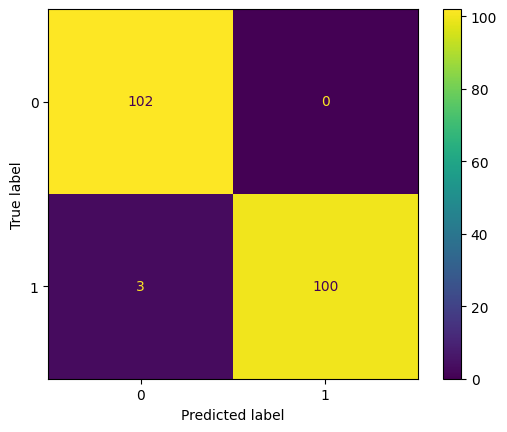

In [125]:

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.show()

In [126]:
y_pred_train = model.predict(X_train)
mean_absolute_error(y_train, y_pred_train)

0.0

In [127]:
mean_absolute_error(y_test, y_pred)

0.014634146341463415

In [128]:
model.score(X_test, y_test)

0.9853658536585366

In [131]:
model.score(X_train, y_train)

1.0

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [144]:
housing = fetch_california_housing()
df = pd.DataFrame(housing['data'], columns=housing.feature_names)
df['target'] = pd.Series(housing.target)

In [146]:
X = df.drop(columns=['target'], axis=1)
y = df['target']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [150]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [153]:
model.score(X_train, y_train)

0.9734319370618995

In [152]:
model.score(X_test, y_test)

0.8037739116116728

In [151]:
y_pred = model.predict(X_test)

In [156]:
mean_absolute_error(y_pred=y_pred, y_true=y_test)

0.327942903900194

In [158]:
mean_squared_error(y_test, y_pred)

0.2571364279891563

In [159]:
mean_squared_error(y_true=y_test, y_pred=y_pred)

0.2571364279891563

In [161]:
y.max()

5.00001

In [162]:
y.min()

0.14999

In [164]:
np.mean(y)

np.float64(2.068558169089147)

In [165]:
df.shape

(20640, 9)

In [167]:
np.square(mean_absolute_error(y_pred=y_pred, y_true=y_test))

np.float64(0.10754654821849187)

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.shape

(1025, 14)

In [7]:
X = df.drop(columns=['target'])
y = df['target']

In [18]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.13, random_state=42
)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.15, random_state=42
)

In [20]:
X_train.shape, y_train.shape

((757, 13), (757,))

In [21]:
X_test.shape, y_test.shape

((134, 13), (134,))

In [22]:
X_validation.shape, y_validation.shape

((134, 13), (134,))

In [23]:
(len(X_train)/len(X))*100

73.85365853658537

In [24]:
(len(X_test)/len(X))*100

13.073170731707318

In [25]:
(len(X_validation)/len(X))*100

13.073170731707318

In [27]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
model.score(X_train, y_train)

1.0

In [29]:
model.score(X_test, y_test)

0.9850746268656716

In [30]:
model.score(X_validation, y_validation)

0.9626865671641791

In [31]:
y_pred = model.predict(X_test)

In [46]:
def classification_metrics(y_true, y_pred):
    print(f"Accuracy Score: {round(accuracy_score(y_true, y_pred)*100,2)}%")
    print(f"Precision: {round(precision_score(y_true, y_pred)*100,2)}%")
    print(f"Recall: {round(recall_score(y_true, y_pred)*100,2)}%")
    print(f"F1 Score: {round(f1_score(y_true, y_pred)*100,2)}%")

In [47]:
classification_metrics(y_test, y_pred)

Accuracy Score: 98.51%
Precision: 97.4%
Recall: 100.0%
F1 Score: 98.68%


In [48]:
y_pred_train = model.predict(X_train)
classification_metrics(y_train, y_pred_train)

Accuracy Score: 100.0%
Precision: 100.0%
Recall: 100.0%
F1 Score: 100.0%


In [49]:
y_pred_validation = model.predict(X_validation)
classification_metrics(y_validation, y_pred_validation)

Accuracy Score: 96.27%
Precision: 96.77%
Recall: 95.24%
F1 Score: 96.0%


In [69]:
model = RandomForestClassifier(n_estimators=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
classification_metrics(y_test, y_pred)

Accuracy Score: 92.54%
Precision: 97.1%
Recall: 89.33%
F1 Score: 93.06%


In [77]:
model = RandomForestClassifier(n_estimators=100, max_depth=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
classification_metrics(y_test, y_pred)

Accuracy Score: 87.31%
Precision: 86.25%
Recall: 92.0%
F1 Score: 89.03%


In [78]:
model = RandomForestClassifier(n_estimators=100, max_depth=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
classification_metrics(y_test, y_pred)

Accuracy Score: 87.31%
Precision: 84.52%
Recall: 94.67%
F1 Score: 89.31%


In [79]:
model = RandomForestClassifier(n_estimators=100, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
classification_metrics(y_test, y_pred)

Accuracy Score: 98.51%
Precision: 97.4%
Recall: 100.0%
F1 Score: 98.68%


In [80]:
model = RandomForestClassifier(n_estimators=100, max_depth=None)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
classification_metrics(y_test, y_pred)

Accuracy Score: 98.51%
Precision: 97.4%
Recall: 100.0%
F1 Score: 98.68%


In [81]:
model = RandomForestClassifier(n_estimators=100, max_depth=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
classification_metrics(y_test, y_pred)

Accuracy Score: 98.51%
Precision: 97.4%
Recall: 100.0%
F1 Score: 98.68%


In [85]:
model = RandomForestClassifier(n_estimators=100, max_depth=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
classification_metrics(y_test, y_pred)

Accuracy Score: 84.33%
Precision: 82.93%
Recall: 90.67%
F1 Score: 86.62%


In [87]:
# Converting your hparams dictionary into a single-item list
hparams_list = [{
    "max_depth": [None, 5, 10, 20, 30],
    "n_estimators": [10, 100, 200, 500, 1000, 12000],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt"]
}]

In [89]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [90]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [95]:
model = RandomForestClassifier(n_jobs=1)
rscv_model = RandomizedSearchCV(
    estimator=model, param_distributions=hparams_list, n_iter=10, cv=5, verbose=2
)

In [96]:
rscv_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_esti

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions=[{'max_depth': [None, 5, 10, 20, 30],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 2, 4],
                                         'min_samples_split': [2, 4, 6],
                                         'n_estimators': [10, 100, 200, 500,
                                                          1000, 12000]}],
                   verbose=2)

In [97]:
rscv_model.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [98]:
y_pred = rscv_model.predict(X_test)
classification_metrics(y_test, y_pred)

Accuracy Score: 98.54%
Precision: 100.0%
Recall: 97.09%
F1 Score: 98.52%
